In [1]:
"""
市场设定：

假设市场中共有9位异置投资者：
1. 风险偏好设定：风险爱好、风险中性、风险厌恶者各有三位； 
2. 财富水平设定：两位投资者将在市场中投入一千万元，三位投资者将在市场中投入一百万元，四位投资者将在市场中投入十万元；
3. 信息获取能力：投入一千万元的投资者均为机构投资者，投入一百万元的投资者有一位为机构投资者，机构拥有更高的信息获取能力，其余均为散户投资者，信息获取能力较低。

具体信息如下：
    风险偏好  财富水平 信息获取
1号   厌恶     1000万      高
2号   中性     1000万      高
3号   厌恶     100万       高
4号   爱好     100万       低
5号   中性     100万       低
6号   厌恶     10万        低
7号   中性     10万        低
8号   爱好     10万        低
9号   爱好     10万        低

不同禀赋投资者策略设定如下：
1. Investor with weak information:
(均值回复理论）
卖出信号： 当股票的短期波动率明显高于长期波动率时，这被视为市场反应过度，暗示着卖出机会。
买入信号： 当股票的短期波动率明显低于长期波动率时，可能预示着未来的上涨，这是一个买入机会。
2. Investor with strong information:
信息获取能力强的投资者倾向长期持有股票，在每月第一个交易日买入股票，最后一个交易日卖出；
3. 风险爱好者买入50%高风险股票，30%中风险股票，20%低风险股票；
   风险中性者买入20%高风险股票，60%中风险股票，20%低风险股票；
   风险厌恶者买入20%高风险股票，30%中风险股票，50%低风险股票；
假设市场仅有三支股票：万科A（000002）、格力电器（000651）、恒瑞医药（600276）
"""

# 1. 风险爱好者买入50%高风险股票，30%中风险股票，20%低风险股票；风险中性者买入20%高风险股票，60%中风险股票，20%低风险股票；风险厌恶者买入20%高风险股票，30%中风险股票，50%低风险股票；
# 2. 信息获取能力强的投资者倾向长期持有股票，在每月第一个交易日买入股票，最后一个交易日卖出；信息获取能力弱的投资者倾向短期持有股票，每两天完成一次股票的买入和卖出（第一天买入，第二天卖出，第三天买入，第四天卖出......）。

'\n市场设定：\n\n假设市场中共有9位异置投资者：\n1. 风险偏好设定：风险爱好、风险中性、风险厌恶者各有三位； \n2. 财富水平设定：两位投资者将在市场中投入一千万元，三位投资者将在市场中投入一百万元，四位投资者将在市场中投入十万元；\n3. 信息获取能力：投入一千万元的投资者均为机构投资者，投入一百万元的投资者有一位为机构投资者，机构拥有更高的信息获取能力，其余均为散户投资者，信息获取能力较低。\n\n具体信息如下：\n    风险偏好  财富水平 信息获取\n1号   厌恶     1000万      高\n2号   中性     1000万      高\n3号   厌恶     100万       高\n4号   爱好     100万       低\n5号   中性     100万       低\n6号   厌恶     10万        低\n7号   中性     10万        低\n8号   爱好     10万        低\n9号   爱好     10万        低\n\n不同禀赋投资者策略设定如下：\n1. Investor with weak information:\n(均值回复理论）\n卖出信号： 当股票的短期波动率明显高于长期波动率时，这被视为市场反应过度，暗示着卖出机会。\n买入信号： 当股票的短期波动率明显低于长期波动率时，可能预示着未来的上涨，这是一个买入机会。\n2. Investor with strong information:\n信息获取能力强的投资者倾向长期持有股票，在每月第一个交易日买入股票，最后一个交易日卖出；\n3. 风险爱好者买入50%高风险股票，30%中风险股票，20%低风险股票；\n   风险中性者买入20%高风险股票，60%中风险股票，20%低风险股票；\n   风险厌恶者买入20%高风险股票，30%中风险股票，50%低风险股票；\n假设市场仅有三支股票：万科A（000002）、格力电器（000651）、恒瑞医药（600276）\n'

In [2]:
1

In [25]:
import numpy as np
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt

token='ae7603bac9c9fd3f78f08f0e5f92ec9222c62f488e9e5a28c5002109'
#ts.set_token(token)
pro = ts.pro_api(token)

8.196753329089538e-05 6.581731613362592e-06 0.0006816466352776567


In [40]:
# 获取市场数据

# 定义tushare调取数据函数
def fetch_stock_data(stock_code, stock_name, start, end):
    df = pro.daily(ts_code=stock_code, start_date=start, end_date=end)
    df.index = pd.to_datetime(df["trade_date"])
    df = df["close"]
    df.name = stock_name
    df.index.rename("date",inplace = True)
    df.sort_index(inplace=True)
    return df

# 获取三支股票收盘价格
start_date = '20180101'
end_date = '20210331'
data = pd.DataFrame({'万科A': fetch_stock_data('000002.SZ', '万科A', start_date, end_date),
                     '格力电器': fetch_stock_data('000651.SZ', '格力电器', start_date, end_date),
                     '恒瑞医药': fetch_stock_data('600276.SH', '恒瑞医药', start_date, end_date)})
data = data.dropna()

# 计算股票收益率
returns = np.log(data.pct_change()+1).dropna()

# 测算三支股票风险
cov_matrix = np.cov(returns)
risk002 = cov_matrix[0, 0]
risk651 = cov_matrix[1, 1]
risk276 = cov_matrix[2, 2]
print(risk002, risk651, risk276)

# 股票风险排序：万科A > 恒瑞医药 > 格力电器

,risk,wealth,information
0,0.0,10000000,1
1,0.5,10000000,1
2,0.0,1000000,1
3,1.0,1000000,0
4,0.5,1000000,0
5,0.0,100000,0
6,0.5,100000,0
7,1.0,100000,0
8,1.0,100000,0


In [41]:
# 存储投资者数据
"""
参数设定：
risk: 风险厌恶者为0，风险中性者为0.5，风险偏好这为0；
information: 获取信息能力强为1，获取信息能力弱为0。
"""
investor = pd.DataFrame({'risk': [0, 0.5, 0, 1, 0.5, 0, 0.5, 1, 1],
                         'wealth': [10000000, 10000000, 1000000, 1000000, 1000000, 100000, 100000, 100000, 100000],
                         'information': [1, 1, 1, 0, 0, 0, 0, 0, 0]})
investor

In [42]:
# 交易策略
def strategy(risk: int, wealth: int, information: int) -> int:
    
    # 新建一个DataFrame,以data的index为index
    signal = pd.DataFrame(index=data.index)
    signal[['high_risk', 'median_risk', 'low_risk']] = data[['万科A', '恒瑞医药', '格力电器']]

    # 将索引日期变为列
    signal = signal.reset_index().rename(columns={"date": "date"})
    # 创建空列表month
    months = []
    for i in range(len(signal)):
        # 提取日期中的月份
        months.append(str(signal['date'][i].month))
    # 创建月份列
    signal['month'] = months
    
    # 初始化订单状态为0
    signal['orders'] = 0
    # 初始仓位为0
    position = 0
    
    # 投资者获取信息能力弱
    if information == 0:
        # 设初始买入信号为TRUE，卖出信号为FALSE
        signal['buy_signal'] = 'TRUE'
        signal['sell_signal'] = 'FALSE'

    # 计算短期（5天）和长期（10天）波动率（标准差）
        signal['short_term_vol'] = signal['median_risk'].ewm(span=5,adjust=False).mean()
        signal['long_term_vol'] = signal['median_risk'].ewm(span=10,adjust=False).mean()

        # 生成交易信号
        # 买入信号：短期波动率显著高于长期波动率 & 转化成字符串
        signal['buy_signal'] = (signal['short_term_vol'] > signal['long_term_vol']).apply(lambda x: "TRUE" if x else "FALSE")
        # 卖出信号：短期波动率显著低于长期波动率 & 转化成字符串
        signal['sell_signal'] = (signal['short_term_vol'] < signal['long_term_vol']).apply(lambda x: "TRUE" if x else "FALSE")

        # 奇数行对应买入信号，偶数行对应卖出信号
        # for i in range(1, len(signal)):
        #     if signal['buy_signal'][i] == signal['buy_signal'][i-1]:
        #         signal['buy_signal'][i] = "FALSE"
        # for i in range(len(signal)-1):
        #     if signal['sell_signal'][i] == signal['sell_signal'][i+1]:
        #         signal['sell_signal'][i+1] = "TRUE"

    # 投资者获取信息能力强
    elif information == 1:
        # 初始买卖信号均为0
        signal['buy_signal'] = 'FALSE'
        signal['sell_signal'] = 'FALSE'
        # 每个月第一天对应买入信号，每个月最后一天对应卖出信号

        for i in range(1, len(signal)):
            if signal['month'][i] != signal['month'][i-1]:
                signal['buy_signal'][i] = 'TRUE'
        for i in range(len(signal)-1):
            if signal['month'][i] != signal['month'][i+1]:
                signal['sell_signal'][i] = 'TRUE'
        signal['buy_signal'][0] = 'TRUE'
        signal['sell_signal'][len(signal)-1] = 'TRUE'
        
        
    # 遍历数据表
    for i in range(len(signal)):
        # 当买入信号为True且仓位为0时买入
        if signal.buy_signal[i] == 'TRUE' and position == 0:
            # 买入指令为1
            signal.orders.values[i] = 1
            # 仓位加1
            position = 1

        # 当卖出信号为True且仓位为1时卖出
        elif signal.sell_signal[i] == 'TRUE' and position == 1:
            # 卖出指令为-1
            signal.orders.values[i] = -1
            # 仓位清0
            position = 0
    
    # 初始各个股票最大可持仓量为0，交易金额为0，可用资金为wealth
    # position_high: how many shares I have bought for high risk stock
    # trade_high: how much money I have invested in high risk stock
    position_high = 0
    position_median = 0
    position_low = 0
    trade_high = 0
    trade_median = 0
    trade_low = 0
    money = wealth
    
    # 初始持仓股票手数、可用资金、交易资金
    signal['stock_high'] = 0
    signal['stock_median'] = 0
    signal['stock_low'] = 0
    signal['money'] = wealth   
            
    for i in range(len(signal)):
        # 当买卖指令为1时
        if signal.orders.values[i] == 1:
            # 风险厌恶者：20%high_risk，30%median_risk，50%low_risk
            if risk == 0:
                position_high = money * 0.2 // (signal.high_risk.values[i])
                position_median = money * 0.3 // (signal.median_risk.values[i])
                position_low = money * 0.5 // (signal.low_risk.values[i])
                trade_high =  - signal.high_risk.values[i]
                trade_median =  - signal.median_risk.values[i]
                trade_low =  - signal.low_risk.values[i]
                money = money + position_high * trade_high + position_median * trade_median + position_low * trade_low
            # 风险中立者：20%high_risk，60%median_risk，20%low_risk
            if risk == 0.5:
                position_high = money * 0.2 // (signal.high_risk.values[i])
                position_median = money * 0.6 // (signal.median_risk.values[i])
                position_low = money * 0.2 // (signal.low_risk.values[i])
                trade_high =  - signal.high_risk.values[i]
                trade_median =  - signal.median_risk.values[i]
                trade_low =  - signal.low_risk.values[i]
                money = money + position_high * trade_high + position_median * trade_median + position_low * trade_low
            # 风险偏好者：50%high_risk，30%median_risk，20%low_risk
            if risk == 1:
                position_high = money * 0.5 // (signal.high_risk.values[i])
                position_median = money * 0.3 // (signal.median_risk.values[i])
                position_low = money * 0.2 // (signal.low_risk.values[i])
                trade_high =  - signal.high_risk.values[i]
                trade_median =  - signal.median_risk.values[i]
                trade_low =  - signal.low_risk.values[i]
                money = money + position_high * trade_high + position_median * trade_median + position_low * trade_low        
        # 当买卖指令为-1时
        elif signal.orders.values[i] == -1:
            money = money + position_high * signal.high_risk.values[i] + position_median * signal.median_risk.values[i] + position_low * signal.low_risk.values[i]
            position_high = 0
            position_median = 0
            position_low = 0
            
        # 持仓数、可用资金
        signal['stock_high'].values[i] = position_high
        signal['stock_median'].values[i] = position_median
        signal['stock_low'].values[i] = position_low
        signal['money'].values[i] = money
 
    # 账户资产总额
    signal['total'] = (signal['stock_high'] * signal['high_risk'] + signal['stock_median'] * signal['median_risk'] + signal['stock_low'] * signal['low_risk']) + signal['money']
 
    return signal

/var/folders/rf/w1c5pmc51gvg00xtlws6z9nh0000gn/T/ipykernel_17107/1393818674.py:171: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  signal['stock_high'].values[i] = position_high
/var/folders/rf/w1c5pmc51gvg00xtlws6z9nh0000gn/T/ipykernel_17107/1393818674.py:172: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  signal['stock_median'].values[i] = position_median
/var/folders/rf/w1c5pmc51gvg00xtlws6z9nh0000gn/T/ipykernel_17107/1393818674.py:173: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Depreca

,date,high_risk,median_risk,low_risk,month,orders,short_term_vol,long_term_vol,buy_signal,sell_signal,stock_high,stock_median,stock_low,money,total
0,2018-01-02,68.67,32.56,45.15,1,0,32.560000,32.560000,FALSE,FALSE,0,0,0,1000000,1000000.00
1,2018-01-03,68.83,32.33,45.65,1,0,32.483333,32.518182,FALSE,TRUE,0,0,0,1000000,1000000.00
2,2018-01-04,70.57,33.12,46.58,1,1,32.695556,32.627603,TRUE,FALSE,4251,15096,4293,59,999999.53
3,2018-01-05,70.32,34.76,47.88,1,0,33.383704,33.015312,TRUE,FALSE,4251,15096,4293,59,1029275.12
4,2018-01-08,71.26,35.99,47.83,1,0,34.252469,33.556164,TRUE,FALSE,4251,15096,4293,59,1051624.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2021-03-25,87.23,30.55,61.38,3,0,31.110795,31.392466,FALSE,TRUE,0,0,0,1217086,1217086.00
778,2021-03-26,91.22,30.72,61.62,3,0,30.980530,31.270200,FALSE,TRUE,0,0,0,1217086,1217086.00
779,2021-03-29,90.53,31.00,62.47,3,0,30.987020,31.221072,FALSE,TRUE,0,0,0,1217086,1217086.00
780,2021-03-30,93.60,31.37,62.10,3,0,31.114680,31.248150,FALSE,TRUE,0,0,0,1217086,1217086.00


In [43]:
# 每月月末各投资者财富总量
Jan = []
Feb = []
Mar = []
Apr = []
May = []
Jun = []
Jul = []
Aug = []
Sep = []
Oct = []
Nov = []
Dec = []

for i in range(len(investor)):
    wealth_sum = strategy(investor['risk'][i], investor['wealth'][i], investor['information'][i])
    for j in range(len(wealth_sum)-1):

        if wealth_sum['month'][j] == '1' and wealth_sum['month'][j+1] == '2':
            Jan.append(wealth_sum['total'].tolist()[j])
        elif wealth_sum['month'][j] == '2' and wealth_sum['month'][j+1] == '3':
            Feb.append(wealth_sum['total'].tolist()[j])
        elif wealth_sum['month'][j] == '3' and wealth_sum['month'][j+1] == '4':
            Mar.append(wealth_sum['total'].tolist()[j])
        elif wealth_sum['month'][j] == '4' and wealth_sum['month'][j+1] == '5':
            Apr.append(wealth_sum['total'].tolist()[j])
        elif wealth_sum['month'][j] == '5' and wealth_sum['month'][j+1] == '6':
            May.append(wealth_sum['total'].tolist()[j])
        elif wealth_sum['month'][j] == '6' and wealth_sum['month'][j+1] == '7':
            Jun.append(wealth_sum['total'].tolist()[j])
        elif wealth_sum['month'][j] == '7' and wealth_sum['month'][j+1] == '8':
            Jul.append(wealth_sum['total'].tolist()[j])
        elif wealth_sum['month'][j] == '8' and wealth_sum['month'][j+1] == '9':
            Aug.append(wealth_sum['total'].tolist()[j])
        elif wealth_sum['month'][j] == '9' and wealth_sum['month'][j+1] == '10':
            Sep.append(wealth_sum['total'].tolist()[j])
        elif wealth_sum['month'][j] == '10' and wealth_sum['month'][j+1] == '11':
            Oct.append(wealth_sum['total'].tolist()[j])
        elif wealth_sum['month'][j] == '11' and wealth_sum['month'][j+1] == '12':
            Nov.append(wealth_sum['total'].tolist()[j])
        Dec.append(wealth_sum['total'].tolist()[len(wealth_sum)-1])

/var/folders/rf/w1c5pmc51gvg00xtlws6z9nh0000gn/T/ipykernel_17107/1393818674.py:171: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  signal['stock_high'].values[i] = position_high
/var/folders/rf/w1c5pmc51gvg00xtlws6z9nh0000gn/T/ipykernel_17107/1393818674.py:172: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  signal['stock_median'].values[i] = position_median
/var/folders/rf/w1c5pmc51gvg00xtlws6z9nh0000gn/T/ipykernel_17107/1393818674.py:173: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Depreca

In [44]:
Jan

[0.6841850682127787,
 0.6826928968818208,
 0.6838316474328742,
 0.6857204864412163,
 0.6852471842588319,
 0.6846450017198474,
 0.6846725504473987,
 0.6851551209098267,
 0.6858150444334324,
 0.6862618926091713,
 0.6851971251797578,
 0.6806052828407493]

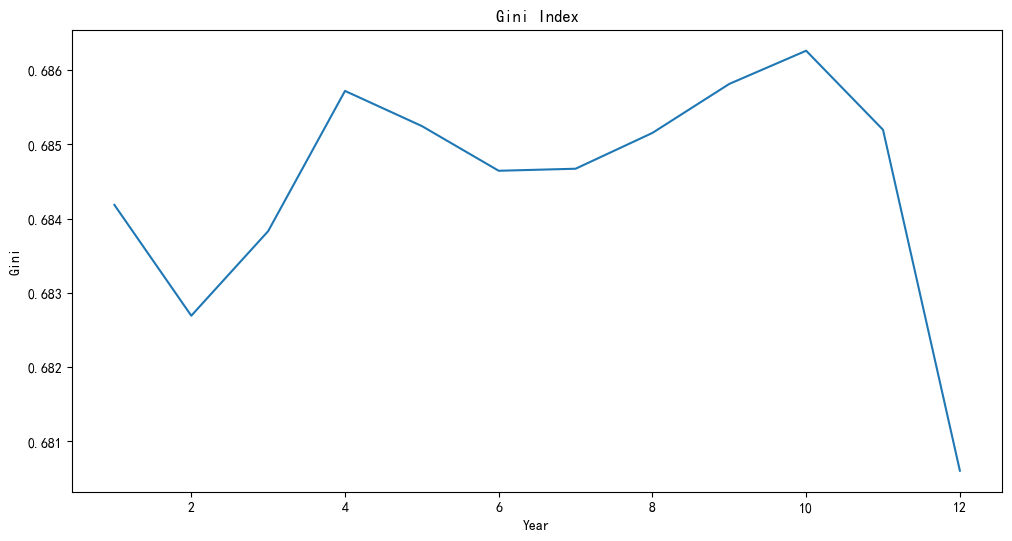

In [45]:
# 测算基尼系数
def gini_index(wealth_list: list[float]) -> float:

    arr = sorted(wealth_list)
    length = len(arr)
    div = 2 * length * sum(arr)
    
    total = 0
    for i in range(length):
        for j in range(length):
            total += abs(arr[i] - arr[j])
            
    return total / div

gini = [gini_index(Jan), gini_index(Feb), gini_index(Mar), gini_index(Apr), gini_index(May), gini_index(Jun), gini_index(Jul), gini_index(Aug), gini_index(Sep), gini_index(Oct), gini_index(Nov), gini_index(Dec)]
gini

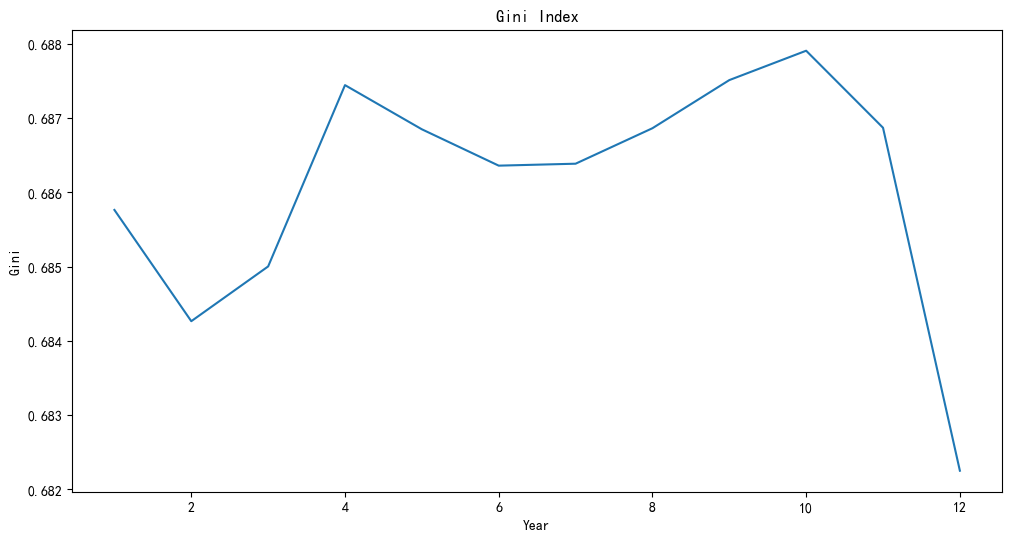

In [37]:
# 绘制每年基尼系数折线图

#设置画布大小
plt.figure(figsize=(12, 6))

# 正确显示中文和负号
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 画图，plt.bar()可以画柱状图
plt.plot(np.arange(1, 13).tolist(), gini)

# 设置图表名称
plt.title("Gini Index")
# 设置x轴标签名
plt.xlabel("Year")
# 设置y轴标签名
plt.ylabel("Gini")
# 显示
plt.show()

In [29]:
1

1